In [1]:
import pandas as pd

import networkx as nx
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

from node2vec import Node2Vec


In [2]:
from sklearn.manifold import TSNE
import numpy as np

In [3]:
#Tutorial source 
#https://lopezyse.medium.com/knowledge-graphs-from-scratch-with-python-f3c2a05914cc

## Step 1: Define the heads, relations, and tails

In [4]:

head = ['drugA', 'drugB', 'drugC', 'drugD', 'drugA', 'drugC', 'drugD', 'drugE', 'gene1', 'gene2','gene3', 'gene4', 'gene50', 'gene2', 'gene3', 'gene4']
relation = ['treats', 'treats', 'treats', 'treats', 'inhibits', 'inhibits', 'inhibits', 'inhibits', 'associated', 'associated', 'associated', 'associated', 'associated', 'interacts', 'interacts', 'interacts']
tail = ['fever', 'hepatitis', 'bleeding', 'pain', 'gene1', 'gene2', 'gene4', 'gene20', 'obesity', 'heart_attack', 'hepatitis', 'bleeding', 'cancer', 'gene1', 'gene20', 'gene50']

# Create a dataframe
df = pd.DataFrame({'head': head, 'relation': relation, 'tail': tail})
df

,head,relation,tail
0,drugA,treats,fever
1,drugB,treats,hepatitis
2,drugC,treats,bleeding
3,drugD,treats,pain
4,drugA,inhibits,gene1
5,drugC,inhibits,gene2
6,drugD,inhibits,gene4
7,drugE,inhibits,gene20
8,gene1,associated,obesity
9,gene2,associated,heart_attack


## Step 2: Create a knowledge graph

In [1]:
G = nx.Graph()
for _, row in df.iterrows():
    G.add_edge(row['head'], row['tail'], label=row['relation'])

NameError: name 'nx' is not defined

## Step 3: Visualize the knowledge graph


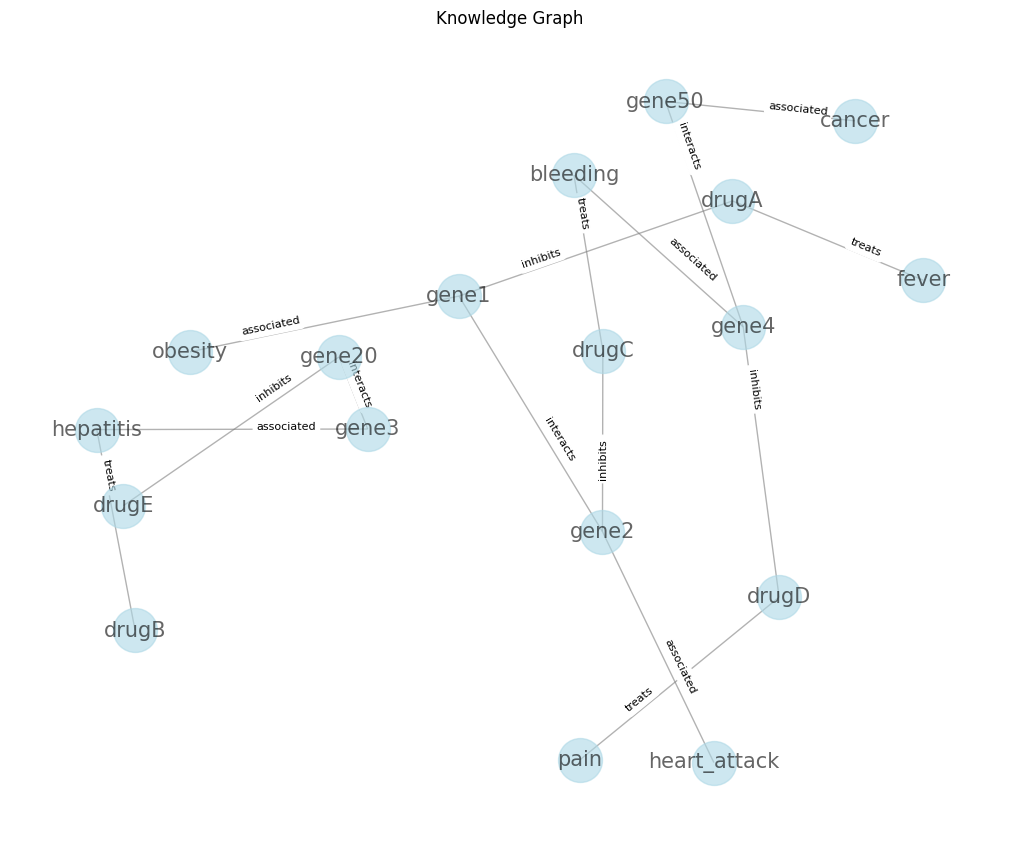

In [6]:
pos = nx.spring_layout(G, seed=42, k=0.9)
labels = nx.get_edge_attributes(G, 'label')
plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, font_size=15, node_size=1000, node_color='lightblue', edge_color='gray', alpha=0.6)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=8, label_pos=0.3, verticalalignment='baseline')
plt.title('Knowledge Graph')
plt.show()

## Step 4: Basic properties  
The first thing we can do with our KG is to see how many nodes and edges it has and analyze their relationship.

In [7]:
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
print(f'Number of nodes: {num_nodes}')
print(f'Number of edges: {num_edges}')
print(f'Ratio edges to nodes: {round(num_edges / num_nodes, 2)}')

Number of nodes: 18
Number of edges: 16
Ratio edges to nodes: 0.89


## Step 5: Degree centrality 

It counts the number of edges incident on a node. Nodes with higher degree of centrality are more connected.


In [8]:
degree_centrality = nx.degree_centrality(G)
for node, centrality in degree_centrality.items():
     print(f'{node}: Degree Centrality = {centrality:.2f}')

drugA: Degree Centrality = 0.12
fever: Degree Centrality = 0.06
drugB: Degree Centrality = 0.06
hepatitis: Degree Centrality = 0.12
drugC: Degree Centrality = 0.12
bleeding: Degree Centrality = 0.12
drugD: Degree Centrality = 0.12
pain: Degree Centrality = 0.06
gene1: Degree Centrality = 0.18
gene2: Degree Centrality = 0.18
gene4: Degree Centrality = 0.18
drugE: Degree Centrality = 0.06
gene20: Degree Centrality = 0.12
obesity: Degree Centrality = 0.06
heart_attack: Degree Centrality = 0.06
gene3: Degree Centrality = 0.12
gene50: Degree Centrality = 0.12
cancer: Degree Centrality = 0.06


## Step 6: Betweenness centrality 
It measures how often a node lies on the shortest path between other nodes, or in other words, the influence of a node on the flow of information between other nodes. Nodes with high betweenness centrality can act as bridges between different parts of the graph.


In [9]:
betweenness_centrality = nx.betweenness_centrality(G)
for node, centrality in betweenness_centrality.items():
     print(f'Betweenness Centrality of {node}: {centrality:.2f}')

Betweenness Centrality of drugA: 0.08
Betweenness Centrality of fever: 0.00
Betweenness Centrality of drugB: 0.00
Betweenness Centrality of hepatitis: 0.02
Betweenness Centrality of drugC: 0.26
Betweenness Centrality of bleeding: 0.26
Betweenness Centrality of drugD: 0.08
Betweenness Centrality of pain: 0.00
Betweenness Centrality of gene1: 0.21
Betweenness Centrality of gene2: 0.29
Betweenness Centrality of gene4: 0.26
Betweenness Centrality of drugE: 0.00
Betweenness Centrality of gene20: 0.02
Betweenness Centrality of obesity: 0.00
Betweenness Centrality of heart_attack: 0.00
Betweenness Centrality of gene3: 0.03
Betweenness Centrality of gene50: 0.08
Betweenness Centrality of cancer: 0.00


## Step 7: Closeness centrality 
It quantifies how quickly a node can reach all other nodes in the graph. Nodes with higher closeness centrality are considered more central because they can communicate with other nodes more efficiently.

In [10]:
closeness_centrality = nx.closeness_centrality(G)
for node, centrality in closeness_centrality.items():
     print(f'Closeness Centrality of {node}: {centrality:.2f}')


Closeness Centrality of drugA: 0.18
Closeness Centrality of fever: 0.15
Closeness Centrality of drugB: 0.09
Closeness Centrality of hepatitis: 0.13
Closeness Centrality of drugC: 0.26
Closeness Centrality of bleeding: 0.26
Closeness Centrality of drugD: 0.19
Closeness Centrality of pain: 0.15
Closeness Centrality of gene1: 0.22
Closeness Centrality of gene2: 0.26
Closeness Centrality of gene4: 0.24
Closeness Centrality of drugE: 0.09
Closeness Centrality of gene20: 0.13
Closeness Centrality of obesity: 0.17
Closeness Centrality of heart_attack: 0.19
Closeness Centrality of gene3: 0.16
Closeness Centrality of gene50: 0.19
Closeness Centrality of cancer: 0.15


## Step 8: Visualize node centrality measures


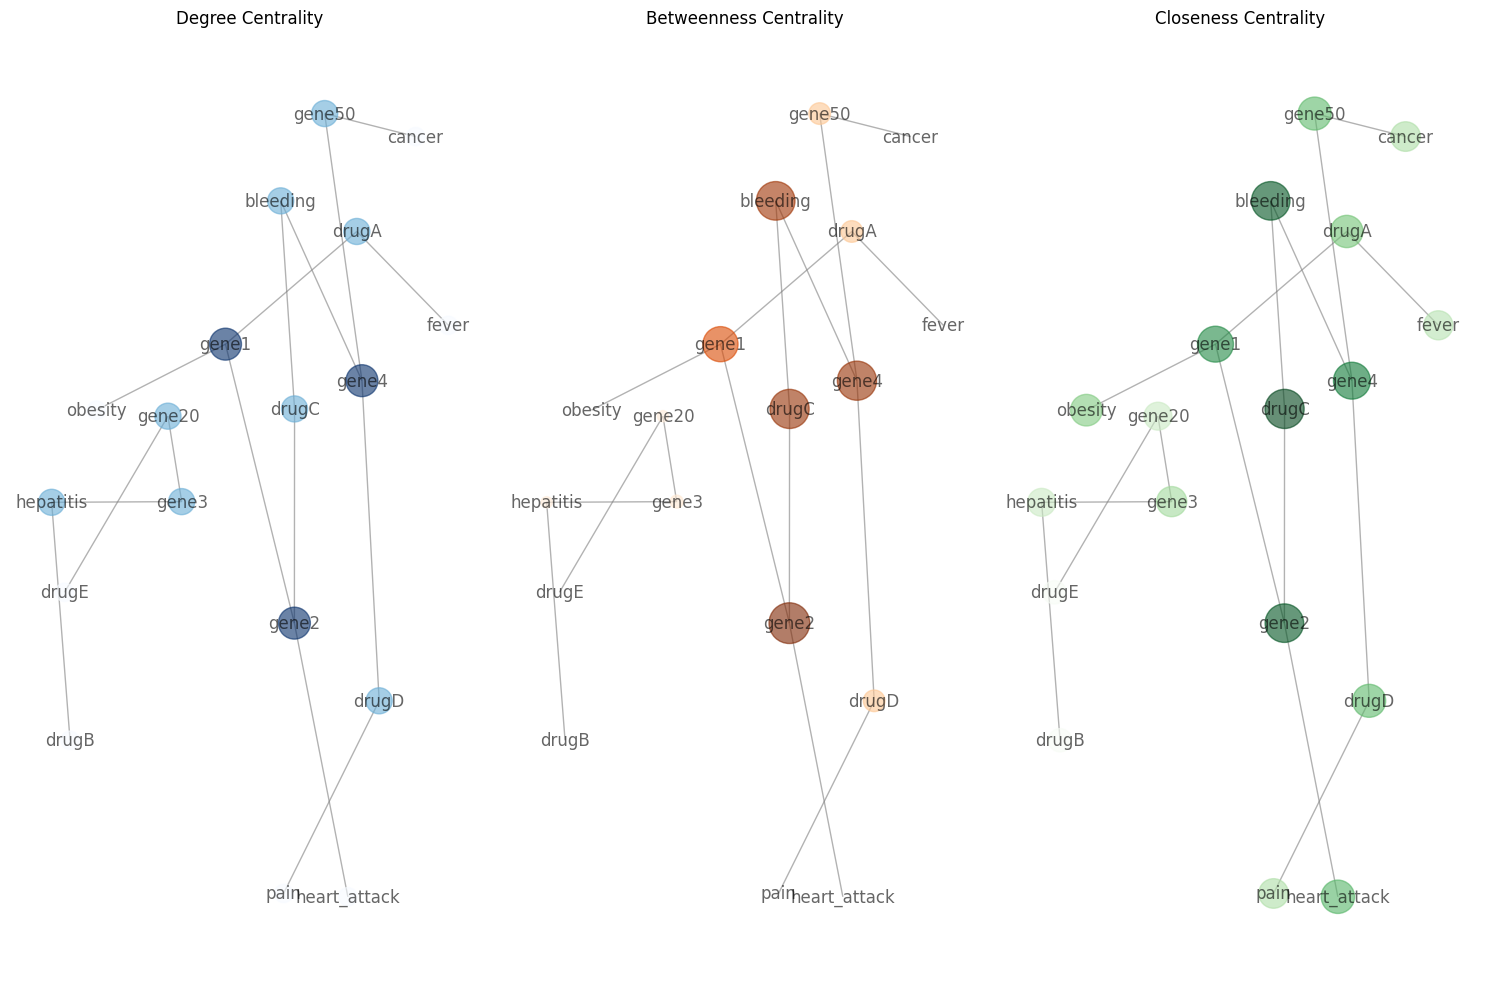

In [11]:
# Calculate centrality measures
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

# Visualize centrality measures
plt.figure(figsize=(15, 10))

# Degree centrality
plt.subplot(131)
nx.draw(G, pos, with_labels=True, font_size=12, node_size=[v * 3000 for v in degree_centrality.values()], node_color=list(degree_centrality.values()), cmap=plt.cm.Blues, edge_color='gray', alpha=0.6)
plt.title('Degree Centrality')

# Betweenness centrality
plt.subplot(132)
nx.draw(G, pos, with_labels=True, font_size=12, node_size=[v * 3000 for v in betweenness_centrality.values()], node_color=list(betweenness_centrality.values()), cmap=plt.cm.Oranges, edge_color='gray', alpha=0.6)
plt.title('Betweenness Centrality')

# Closeness centrality
plt.subplot(133)
nx.draw(G, pos, with_labels=True, font_size=12, node_size=[v * 3000 for v in closeness_centrality.values()], node_color=list(closeness_centrality.values()), cmap=plt.cm.Greens, edge_color='gray', alpha=0.6)
plt.title('Closeness Centrality')

plt.tight_layout()
plt.show()

## Step 9: Shortest Path Analysis
Shortest path analysis focuses on finding the shortest path between two nodes in the graph. This can help you understand the connectivity between different entities and the minimum number of relationships required to connect them. For example, let’s say you want to find the shortest path between the nodes ‘gene2’ and ‘cancer’:



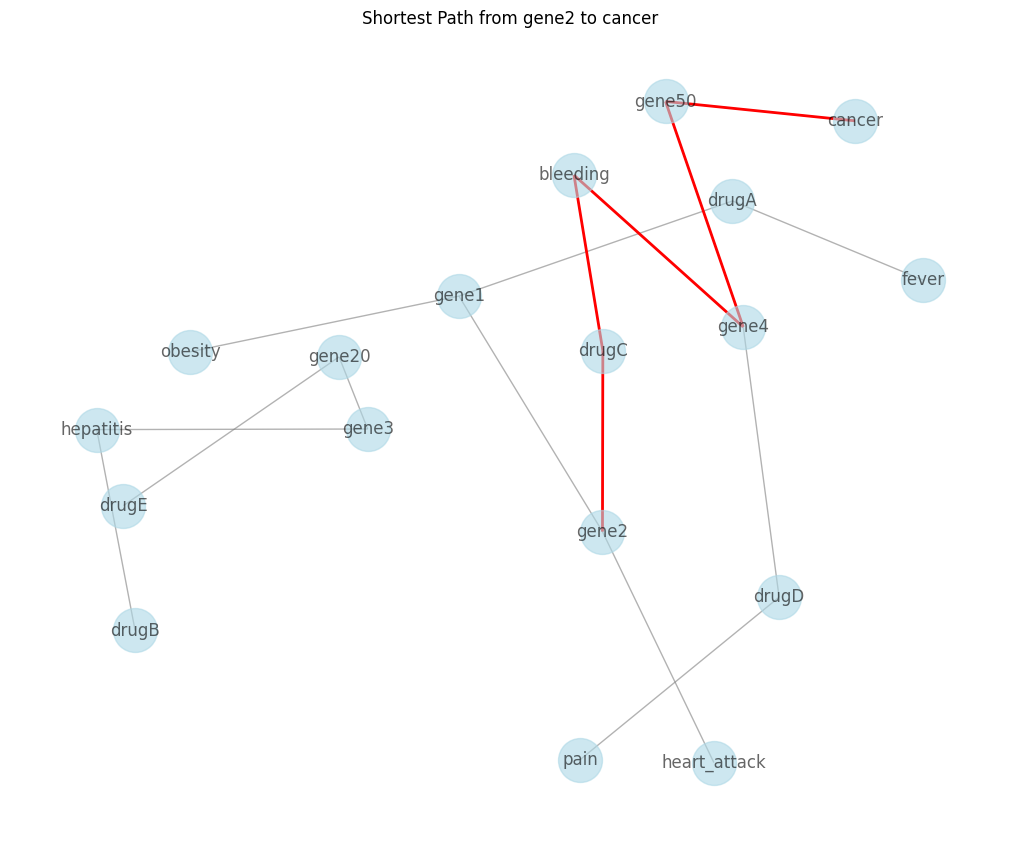

Shortest Path: ['gene2', 'drugC', 'bleeding', 'gene4', 'gene50', 'cancer']


In [12]:
source_node = 'gene2'
target_node = 'cancer'

# Find the shortest path
shortest_path = nx.shortest_path(G, source=source_node, target=target_node)

# Visualize the shortest path
plt.figure(figsize=(10, 8))
path_edges = [(shortest_path[i], shortest_path[i + 1]) for i in range(len(shortest_path) - 1)]
nx.draw(G, pos, with_labels=True, font_size=12, node_size=1000, node_color='lightblue', edge_color='gray', alpha=0.6)
nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2)
plt.title(f'Shortest Path from {source_node} to {target_node}')
plt.show()
print('Shortest Path:', shortest_path)


## Step 10: Create Embeddings
Graph embeddings are mathematical representations of nodes or edges in a graph in a continuous vector space. These embeddings capture the structural and relational information of the graph, allowing us to perform various analyses, such as node similarity calculation and visualization in lower-dimensional space.

Next, we’ll use the node2vec algorithm, which learns embeddings by performing random walks on the graph and optimizing to preserve the local neighborhood structure of nodes.

Computing transition probabilities:   0%|          | 0/18 [00:00<?, ?it/s]

Generating walks (CPU: 4): 100%|██████████| 50/50 [00:00<00:00, 833.42it/s]


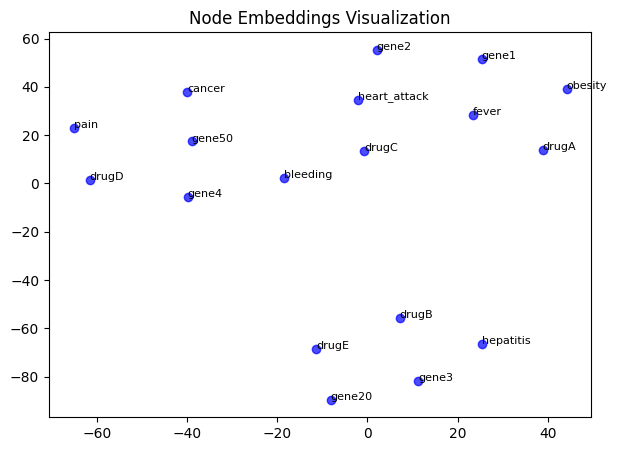

In [13]:
# Generate node embeddings using node2vec
node2vec = Node2Vec(G, dimensions=64, walk_length=30, num_walks=200, workers=4) # You can adjust these parameters
model = node2vec.fit(window=10, min_count=1, batch_words=4) # Training the model

# Visualize node embeddings using t-SNE


# Get embeddings for all nodes
embeddings = np.array([model.wv[node] for node in G.nodes()])

# Reduce dimensionality using t-SNE
tsne = TSNE(n_components=2, perplexity=10, n_iter=400)
embeddings_2d = tsne.fit_transform(embeddings)

# Visualize embeddings in 2D space with node labels
plt.figure(figsize=(7, 5))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c='blue', alpha=0.7)

# Add node labels
for i, node in enumerate(G.nodes()):
     plt.text(embeddings_2d[i, 0], embeddings_2d[i, 1], node, fontsize=8)

plt.title('Node Embeddings Visualization')
plt.show()

## Step 11: Clustering
Clustering is a technique to find groups of observations with similar characteristics. 
This process is not driven by a specific purpose, which means you don’t have to specifically 
tell your algorithm how to group those observations since it does it independently (groups are formed organically). The result is that observations (or data points) in the same group are more similar to them than other observations in another group. The goal is to obtain data points in the same group as similar as possible and data points in different groups as dissimilar as possible.

# K-Means

K-means uses an iterative refinement method to produce its final clustering based on the number of clusters defined by the user (represented by the variable K) and the dataset. For example, if you set K equal to 3, then your dataset will be grouped in 3 clusters; if you set K equal to 4, you will group the data in 4 clusters, and so on.

Let’s visualize the K-Means clustering in the embedding space. This will give you a clear view of how the algorithm clusters nodes based on their embeddings:

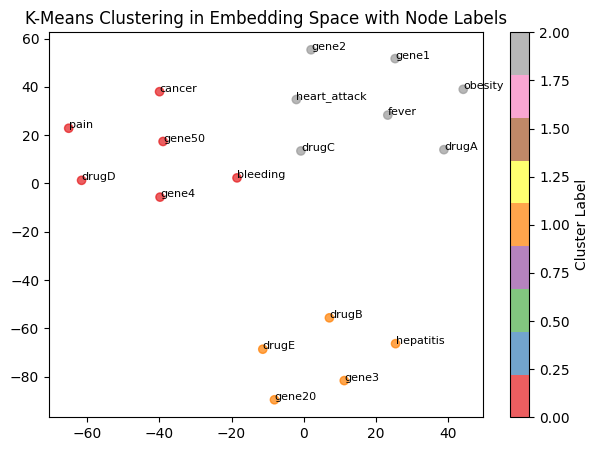

In [14]:
# Perform K-Means clustering on node embeddings
num_clusters = 3 # Adjust the number of clusters
kmeans = KMeans(n_clusters=num_clusters, n_init='auto',random_state=42)
cluster_labels = kmeans.fit_predict(embeddings)

# Visualize K-Means clustering in the embedding space with node labels
plt.figure(figsize=(7, 5))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=cluster_labels, cmap=plt.cm.Set1, alpha=0.7)

# Add node labels
for i, node in enumerate(G.nodes()):
    plt.text(embeddings_2d[i, 0], embeddings_2d[i, 1], node, fontsize=8)

plt.title('K-Means Clustering in Embedding Space with Node Labels')
plt.colorbar(label="Cluster Label")
plt.show()


# K-means clustering on node embeddings 

The resulting cluster labels are used to color the points in the scatter plot of the 2D embedding space. Each color represents a different cluster. Now we can go back to the graph representation and interpret this information in the original space:

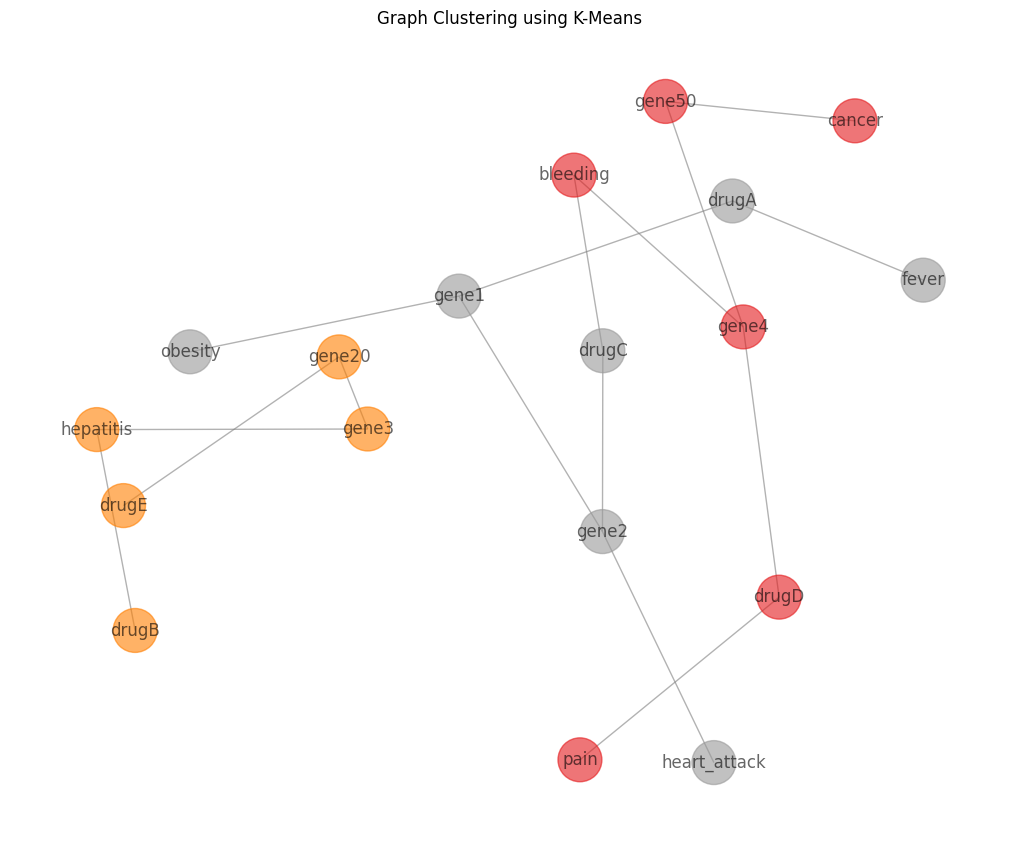

In [15]:


# Visualize clusters
plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, font_size=12, node_size=1000, node_color=cluster_labels, cmap=plt.cm.Set1,
        edge_color='gray', alpha=0.6)
plt.title('Graph Clustering using K-Means')

plt.show()

# DBSCAN

Density-Based Clustering algorithms like DBSCAN don’t require a preset number of clusters. It also identifies outliers as noises. Additionally, it can find arbitrarily sized and arbitrarily shaped clusters quite well. Here’s an example of how you can use the DBSCAN algorithm for graph clustering, focusing on clustering nodes based on their embeddings obtained from the node2vec algorithm.

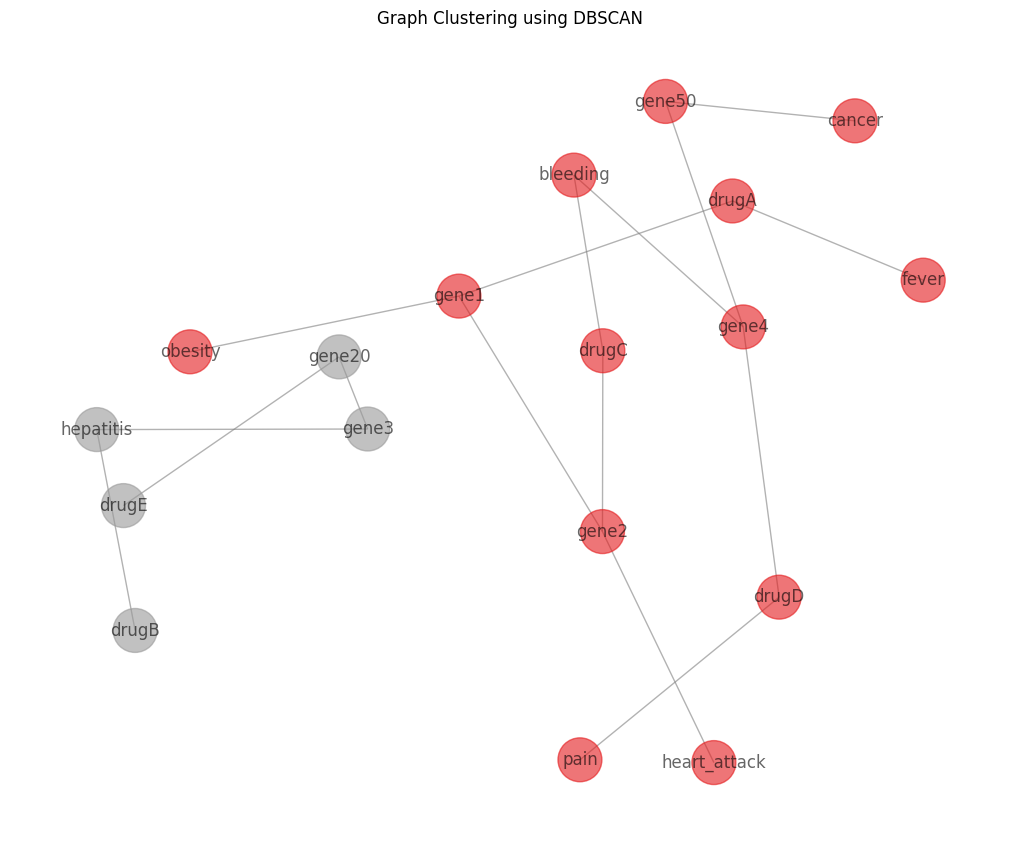

In [16]:
# Perform DBSCAN clustering on node embeddings
dbscan = DBSCAN(eps=1.0, min_samples=2) # Adjust eps and min_samples
cluster_labels = dbscan.fit_predict(embeddings)

# Visualize clusters
plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, font_size=12, node_size=1000, node_color=cluster_labels, cmap=plt.cm.Set1, 
        edge_color='gray', alpha=0.6)
plt.title('Graph Clustering using DBSCAN')
plt.show()

# Summary 

The eps parameter defines the maximum distance between two samples for one to be considered as in the neighborhood of the other, and the min_samples parameter determines the minimum number of samples in a neighborhood for a point to be considered as a core point.

DBSCAN will assign nodes to clusters and identify noise points that don’t belong to any cluster.